In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math

In [ ]:
#Definicion de funcion varianza
def varianza(x):
    x0=np.mean(x)
    n=len(x)
    sum=0
    for i in range(n):
        sum+=(x0-x[i])**2
    return np.sqrt(sum/(n-1))

def bootstrap(x, func, m=1000):
    """
    --Parámetros--

    x=datos
    func=estadistico que quiero calcular
    m=cantidad de veces que se va a realizar el bootstrap

    --Retorna--
    un remuestreo evaluado de la funcion
    """
    _y = np.zeros(m)
    for i in range(m):
        _x=np.random.choice(x,size=len(x),replace=True)
        _y[i]= func(_x)

    return _y 

def bootstrap_confianza(x, func,alpha=0.05 ,m=1000):
    """
    
    """

    _y = np.zeros(m)
    for i in range(m):
        _x=np.random.choice(x,size=len(x),replace=True)
        _y[i]= func(_x)
    




datos = np.random.normal(loc=0, scale=1, size=100)

var = varianza(datos)


EJERCICIO 4: sacado del github de cande, terminar de entender que mierda hizo jejej

<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_25588/4219936918.py:16: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Distribución de Poisson con $\lambda$ = %i '%mu)


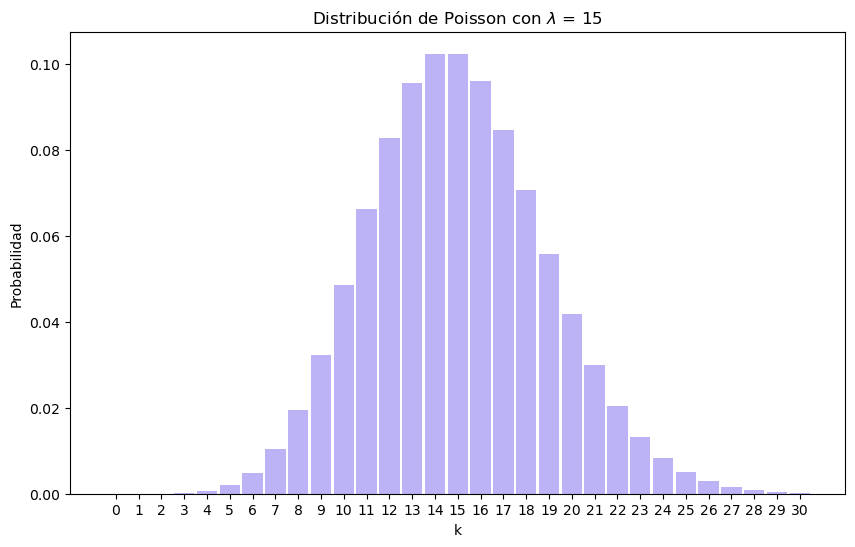

In [7]:
mu=15
kmax=30
def poisson():   
    k=range(0,kmax+1,1)
    y=[]
    for i in k:
        p=(mu**i)*(np.exp(-mu))/ math.factorial(i)
        y.append(p)
    return k, y
#
#Grafico:
plt.figure(figsize=(10,6))
k,y=poisson()
plt.bar(k,y, alpha=0.5, color='mediumslateblue', width=0.9, lw=3)
plt.xticks(np.arange(0,kmax+1)) 
plt.title('Distribución de Poisson con $\lambda$ = %i '%mu)
plt.xlabel('k')
plt.ylabel('Probabilidad')
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_25588/3375714445.py:21: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Ocurrencia de eventos en un proceso de Poisson con $\lambda$=5/h')


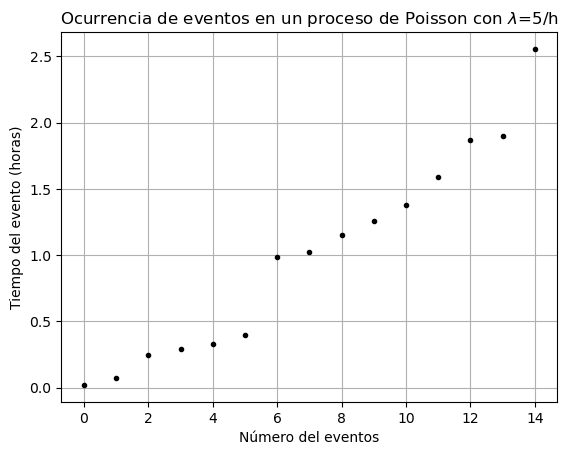

In [10]:
n=range(100)        #n representa al numero de eventos
def tiempo3(a=5):   #a representa a lambda
    tn = 0          #tiempo del evento inicial
    lista_n=[]      
    lista_tn=[]
    for j in n:
        u = np.random.random()  #random entre 0 y 1
        x = -np.log(1 - u)/a    #tiemppo entre eventos consecutivos
        tn=tn+x              #los voy sumando
        if tn<=3:
            lista_n.append(j)
            lista_tn.append(tn)
        else:
            break
    return lista_n, lista_tn
#
#Grafico
#plt.figure(figsize=(10,6))
N, t=tiempo3()
plt.plot(N,t,'.', color='black')
plt.title('Ocurrencia de eventos en un proceso de Poisson con $\lambda$=5/h')
plt.xlabel('Número del eventos')
plt.ylabel('Tiempo del evento (horas)')
plt.grid()
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_25588/4134121213.py:16: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Distribución de Poisson con $\lambda$ = 5/h')


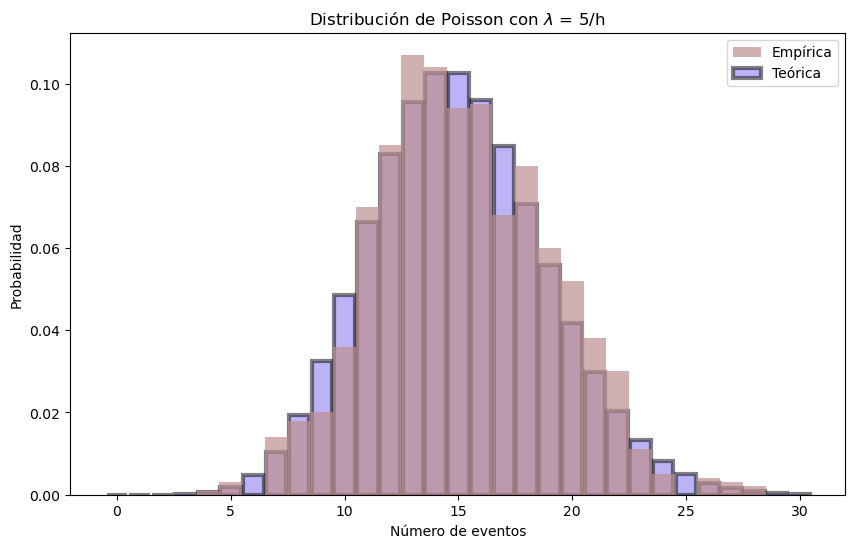

In [14]:
def funcion_n():
    lista=[]
    for i in range(1000):      #veces que orteo 1000 veces la función
        n3, t3=tiempo3()
        N_total=len(n3)        #guardo la cantidad de N de cada función
        lista.append(N_total)
    return lista
#
#Gráfico
plt.figure(figsize=(10,6))
#Comparo con la distribución teórica
plt.bar(k,y, alpha=0.5, color='mediumslateblue', width=0.9, ec='black', lw=3, label= 'Teórica')
#Función empírica:
N_final=funcion_n()
plt.hist(N_final, bins=np.arange(30), density=True, color='rosybrown', label= 'Empírica', alpha=0.7, align='left')
plt.title('Distribución de Poisson con $\lambda$ = 5/h')
plt.xlabel('Número de eventos')
plt.ylabel('Probabilidad')
plt.legend(loc='upper right')
plt.show()

Primero voy a generar todas las funciones para la distribución de Fisher-Tippett y probar que se ejecuten correctamente, para esto comparo con la siguiente página: http://www.nematrian.com/GEVDistribution

In [56]:
def fisher_tippett(x, mu, xi, sig):
    """Función de densidad de probabilidad de la distribución GEV"""
    if xi == 0:
        # Caso Gumbel
        t = np.exp((x - mu) / sig)
    else:
        # Caso general GEV
        t = (1+xi/sig*(x-mu))**(-1/xi)

    return (1/sig) *t**(xi+1)* np.exp(-t)

def acum_fisher_tippett(x, mu, xi, sig):
    """Función de distribución acumulada de la GEV"""
    if xi == 0:
        t = np.exp((x - mu) / sig)
        
    else:
        t = (1+xi/sig*(x-mu))**(-1/xi)
    return np.exp(-t)

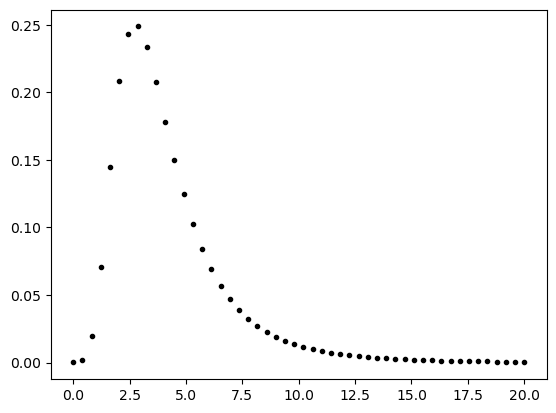

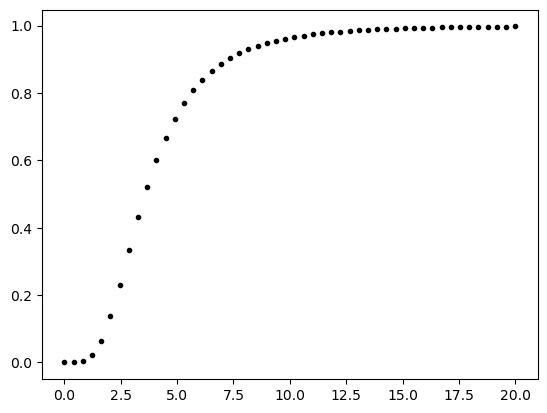

In [57]:
x=np.linspace(0,20)
ft=fisher_tippett(x,xi=0.2,mu=3,sig=1.5)
aft=acum_fisher_tippett(x,xi=0.2,mu=3,sig=1.5)
plt.scatter(x,ft,color='k',marker='.')
plt.show()
plt.scatter(x,aft,color='k',marker='.')
plt.show()

Ahora pruebo el metodo de la inversa para los mismos parametros para corroborar que esten definidas correctamente:

In [58]:
def inv_fisher_tippett(y, mu, xi, sig):
    """Función cuantil (inversa) de la distribución GEV"""
    # Asegurar que y esté en (0,1)
    y = np.clip(y, 1e-10, 1-1e-10)
    
    if xi == 0:
        # Caso Gumbel: x = μ - σ * ln(-ln(F))
        return mu - sig * np.log(-np.log(y))
    else:
        # Caso general GEV: x = μ + (σ/ξ) * [(-ln(F))^(-ξ) - 1]
        return mu + (sig/xi) * ((-np.log(y))**(-xi) - 1)


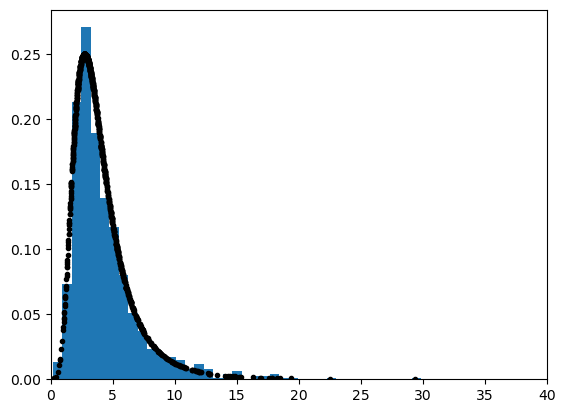

In [62]:
n=1000
u=np.random.random(size=n)

xft=inv_fisher_tippett(u,xi=0.2,mu=3,sig=1.5)

ft=fisher_tippett(xft,xi=0.2,mu=3,sig=1.5)
plt.hist(xft,bins='auto',density=True)
plt.scatter(xft,ft,color='k',marker='.')
plt.xlim(0,40)
plt.show()

=== DEFINICIÓN DE LA PDF GEV ===

=== VERIFICACIÓN DE PROPIEDADES GEV ===
Parámetros: μ = 0, σ = 1, ξ = 0
1. PDF no negativa: True
2. Integral de PDF: 1.000000 (debe ser ≈ 1)
3. Diferencia máxima PDF vs dCDF/dx: 6.45e-07

=== VERIFICACIÓN DE PROPIEDADES GEV ===
Parámetros: μ = 0, σ = 1, ξ = 0.3
1. PDF no negativa: True
2. Integral de PDF: 0.998477 (debe ser ≈ 1)
3. Diferencia máxima PDF vs dCDF/dx: 1.67e+02

=== VERIFICACIÓN DE PROPIEDADES GEV ===
Parámetros: μ = 0, σ = 1, ξ = -0.3
1. PDF no negativa: True
2. Integral de PDF: 1.000000 (debe ser ≈ 1)
3. Diferencia máxima PDF vs dCDF/dx: 1.67e+02



/tmp/ipykernel_15701/119929136.py:114: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(pdf_values, x)


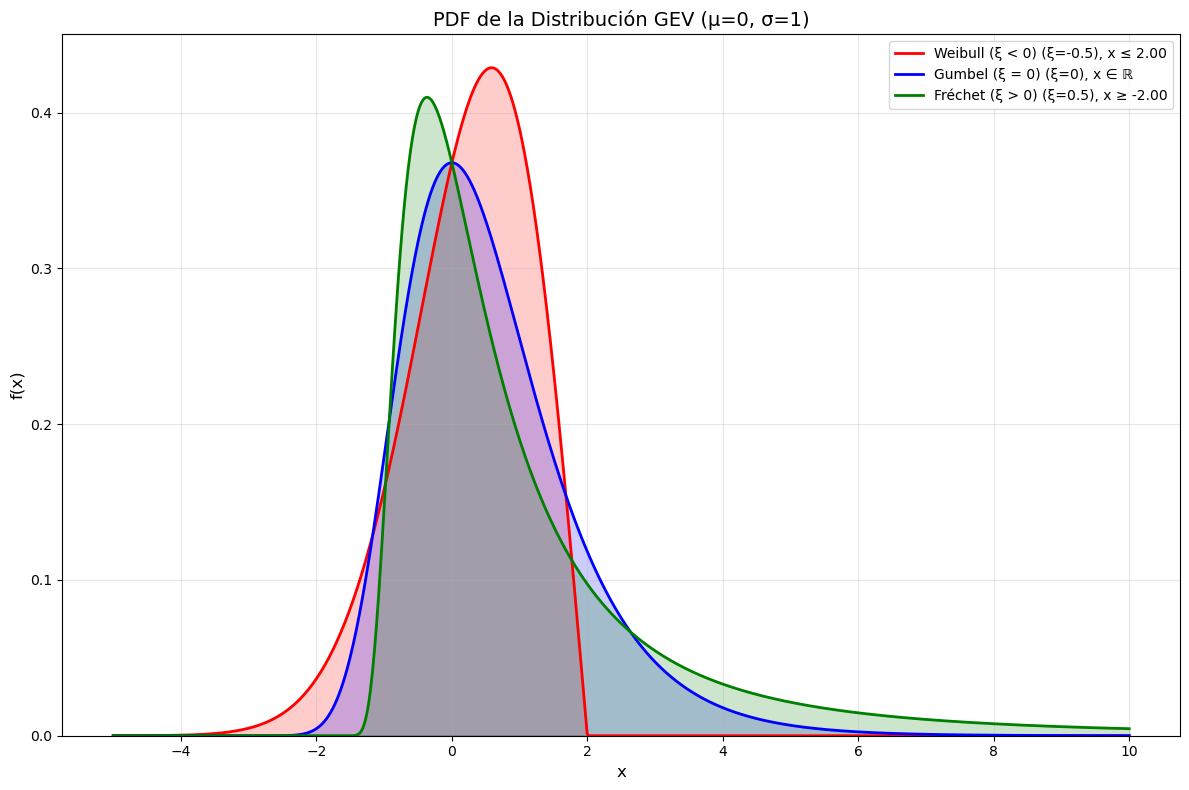

=== COMPARACIÓN CON SCIPY ===


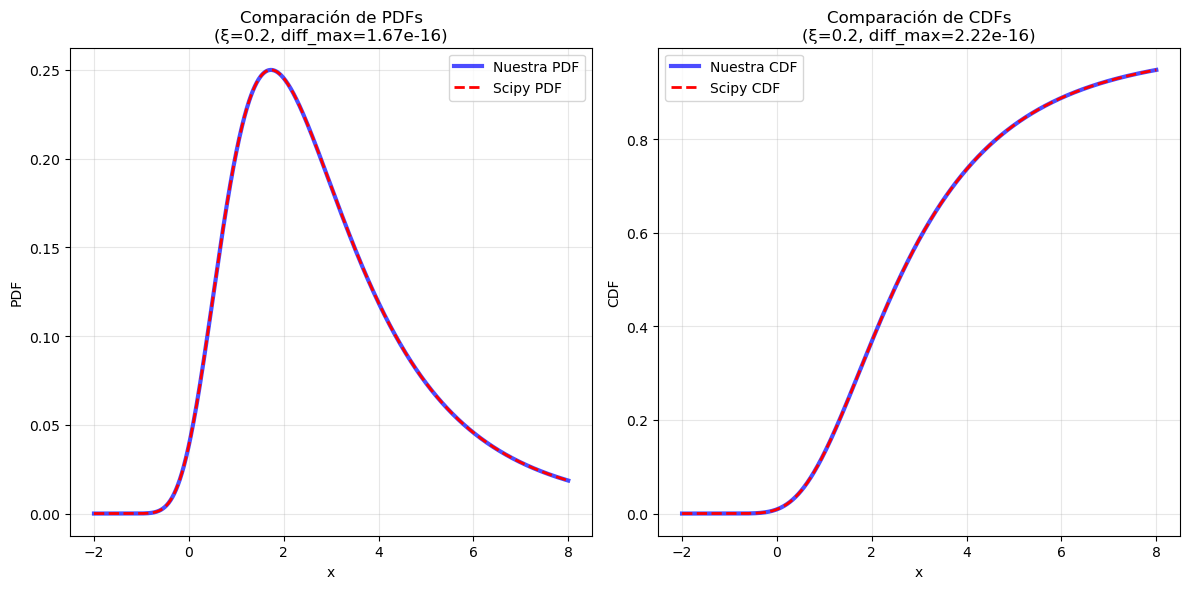

Diferencia máxima PDF: 1.67e-16
Diferencia máxima CDF: 2.22e-16
=== APLICACIÓN CON DATOS SIMULADOS ===
Parámetros reales: μ=5, σ=2, ξ=0.3
Parámetros estimados: μ=8.228, σ=-1.598, ξ=-2.365


ValueError: El parámetro sigma debe ser mayor que 0

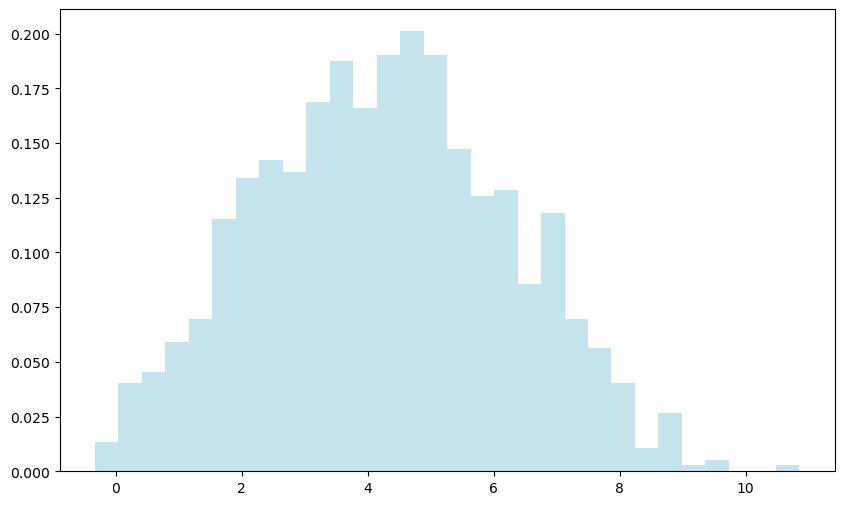

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import warnings

def gev_pdf(x, mu, sigma, xi):
    """
    Función de Densidad de Probabilidad (PDF) de la Distribución de Valor Extremo Generalizada (GEV)
    
    Parameters:
    -----------
    x : array-like
        Valores donde evaluar la PDF
    mu : float
        Parámetro de localización (location)
    sigma : float
        Parámetro de escala (scale) > 0
    xi : float
        Parámetro de forma (shape)
    
    Returns:
    --------
    pdf : array-like
        Valores de la PDF en los puntos x
    """
    
    # Convertir a array numpy
    x = np.asarray(x, dtype=float)
    pdf = np.zeros_like(x)
    
    # Asegurar que sigma > 0
    if sigma <= 0:
        raise ValueError("El parámetro sigma debe ser mayor que 0")
    
    # Caso 1: ξ ≠ 0 (Fréchet o Weibull)
    if abs(xi) > 1e-10:  # Usamos tolerancia numérica para ξ ≈ 0
        
        # Calcular z = (x - μ) / σ
        z = (x - mu) / sigma
        
        # Condición de soporte: 1 + ξ*z > 0
        condition = (1 + xi * z) > 0
        
        # Para puntos que satisfacen la condición
        if np.any(condition):
            z_valid = z[condition]
            term = 1 + xi * z_valid
            
            # PDF para ξ ≠ 0
            pdf[condition] = (1/sigma) * term**(-1/xi - 1) * np.exp(-term**(-1/xi))
        # Para puntos fuera del soporte, PDF = 0 (ya está inicializado en 0)
    
    # Caso 2: ξ = 0 (Gumbel)
    else:
        z = (x - mu) / sigma
        # PDF para ξ = 0 (Gumbel)
        pdf = (1/sigma) * np.exp(-z - np.exp(-z))
    
    return pdf

def gev_cdf(x, mu, sigma, xi):
    """
    Función de Distribución Acumulada (CDF) de la GEV
    """
    x = np.asarray(x, dtype=float)
    cdf = np.zeros_like(x)
    
    if sigma <= 0:
        raise ValueError("El parámetro sigma debe ser mayor que 0")
    
    # Caso ξ ≠ 0
    if abs(xi) > 1e-10:
        z = (x - mu) / sigma
        condition = (1 + xi * z) > 0
        
        if np.any(condition):
            z_valid = z[condition]
            term = 1 + xi * z_valid
            cdf[condition] = np.exp(-term**(-1/xi))
        
        # Para x fuera del soporte
        cdf[~condition & (xi > 0)] = 1.0  # Fréchet: soporte [μ - σ/ξ, ∞)
        cdf[~condition & (xi < 0)] = 0.0  # Weibull: soporte (-∞, μ - σ/ξ]
    
    # Caso ξ = 0 (Gumbel)
    else:
        z = (x - mu) / sigma
        cdf = np.exp(-np.exp(-z))
    
    return cdf

def verificar_propiedades_pdf(mu, sigma, xi, x_range=(-10, 20)):
    """
    Verifica propiedades importantes de la PDF
    """
    print(f"=== VERIFICACIÓN DE PROPIEDADES GEV ===")
    print(f"Parámetros: μ = {mu}, σ = {sigma}, ξ = {xi}")
    
    # Generar puntos de evaluación
    x = np.linspace(x_range[0], x_range[1], 10000)
    
    # Calcular PDF
    pdf_values = gev_pdf(x, mu, sigma, xi)
    
    # 1. No negatividad
    es_no_negativa = np.all(pdf_values >= -1e-10)  # Tolerancia numérica
    print(f"1. PDF no negativa: {es_no_negativa}")
    
    # 2. Integral igual a 1 (normalización)
    if np.any(pdf_values > 0):
        # Calcular integral numéricamente
        dx = x[1] - x[0]
        integral = np.trapz(pdf_values, x)
        print(f"2. Integral de PDF: {integral:.6f} (debe ser ≈ 1)")
        
        # 3. Relación con CDF (derivada)
        cdf_values = gev_cdf(x, mu, sigma, xi)
        pdf_numerica = np.gradient(cdf_values, x)
        
        # Comparar PDF analítica vs numérica (derivada de CDF)
        diferencia_max = np.max(np.abs(pdf_values - pdf_numerica))
        print(f"3. Diferencia máxima PDF vs dCDF/dx: {diferencia_max:.2e}")
    else:
        print("2. PDF es cero en todo el rango evaluado")
    
    print()

def visualizar_gev_pdf(mu=0, sigma=1, xi_values=[-0.3, 0, 0.3], x_range=(-5, 10)):
    """
    Visualiza la PDF de la GEV para diferentes valores de ξ
    """
    plt.figure(figsize=(12, 8))
    
    # Generar puntos de evaluación
    x = np.linspace(x_range[0], x_range[1], 1000)
    
    # Colores para diferentes ξ
    colors = ['red', 'blue', 'green']
    labels = ['Weibull (ξ < 0)', 'Gumbel (ξ = 0)', 'Fréchet (ξ > 0)']
    
    for i, xi in enumerate(xi_values):
        try:
            # Calcular PDF
            pdf = gev_pdf(x, mu, sigma, xi)
            
            # Determinar límites del soporte
            if abs(xi) > 1e-10:
                limite = mu - sigma/xi
                if xi > 0:  # Fréchet
                    soporte = f", x ≥ {limite:.2f}"
                else:  # Weibull
                    soporte = f", x ≤ {limite:.2f}"
            else:
                soporte = ", x ∈ ℝ"
            
            # Graficar
            plt.plot(x, pdf, color=colors[i], linewidth=2, 
                    label=f'{labels[i]} (ξ={xi}){soporte}')
            
            # Rellenar área bajo la curva
            plt.fill_between(x, pdf, alpha=0.2, color=colors[i])
            
        except Exception as e:
            print(f"Error para ξ={xi}: {e}")
    
    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.title(f'PDF de la Distribución GEV (μ={mu}, σ={sigma})', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()

def comparar_con_scipy(mu=2, sigma=1.5, xi=0.2, x_range=(-2, 8)):
    """
    Compara nuestra implementación con scipy.stats.genextreme
    """
    from scipy.stats import genextreme
    
    x = np.linspace(x_range[0], x_range[1], 1000)
    
    # Nuestra implementación
    pdf_nuestra = gev_pdf(x, mu, sigma, xi)
    cdf_nuestra = gev_cdf(x, mu, sigma, xi)
    
    # Scipy (nota: scipy usa parametrización diferente)
    # Scipy: genextreme.pdf(x, c, loc=μ, scale=σ) donde c = -ξ
    pdf_scipy = genextreme.pdf(x, -xi, loc=mu, scale=sigma)
    cdf_scipy = genextreme.cdf(x, -xi, loc=mu, scale=sigma)
    
    # Calcular diferencias
    diff_pdf = np.max(np.abs(pdf_nuestra - pdf_scipy))
    diff_cdf = np.max(np.abs(cdf_nuestra - cdf_scipy))
    
    # Graficar comparación
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(x, pdf_nuestra, 'b-', linewidth=3, label='Nuestra PDF', alpha=0.7)
    plt.plot(x, pdf_scipy, 'r--', linewidth=2, label='Scipy PDF')
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.title(f'Comparación de PDFs\n(ξ={xi}, diff_max={diff_pdf:.2e})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(x, cdf_nuestra, 'b-', linewidth=3, label='Nuestra CDF', alpha=0.7)
    plt.plot(x, cdf_scipy, 'r--', linewidth=2, label='Scipy CDF')
    plt.xlabel('x')
    plt.ylabel('CDF')
    plt.title(f'Comparación de CDFs\n(ξ={xi}, diff_max={diff_cdf:.2e})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return diff_pdf, diff_cdf

def ejemplo_aplicacion_datos_reales():
    """
    Ejemplo de aplicación con datos simulados
    """
    # Generar datos que siguen una distribución GEV
    np.random.seed(42)
    mu_real, sigma_real, xi_real = 5, 2, 0.3
    datos = mu_real + sigma_real/xi_real * (np.random.gamma(1, 1, 1000)**xi_real - 1)
    
    # Estimación de parámetros (método simple por percentiles)
    q87 = np.percentile(datos, 87)
    q97 = np.percentile(datos, 97)
    
    # Estimación inicial de ξ (aproximada)
    xi_est = np.log((q97 - q87)/q87) / np.log(2)
    sigma_est = (q97 - q87) / (2**xi_est - 1)
    mu_est = q87 - sigma_est
    
    print("=== APLICACIÓN CON DATOS SIMULADOS ===")
    print(f"Parámetros reales: μ={mu_real}, σ={sigma_real}, ξ={xi_real}")
    print(f"Parámetros estimados: μ={mu_est:.3f}, σ={sigma_est:.3f}, ξ={xi_est:.3f}")
    
    # Graficar histograma y PDF ajustada
    plt.figure(figsize=(10, 6))
    plt.hist(datos, bins=30, density=True, alpha=0.7, label='Datos', color='lightblue')
    
    x_fit = np.linspace(np.min(datos), np.max(datos), 1000)
    pdf_fit = gev_pdf(x_fit, mu_est, sigma_est, xi_est)
    plt.plot(x_fit, pdf_fit, 'r-', linewidth=2, label='GEV Ajustada')
    
    plt.xlabel('x')
    plt.ylabel('Densidad')
    plt.title('Ajuste de GEV a Datos Simulados')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# EJECUCIÓN DE EJEMPLOS
if __name__ == "__main__":
    print("=== DEFINICIÓN DE LA PDF GEV ===\n")
    
    # 1. Verificar propiedades para diferentes casos
    verificar_propiedades_pdf(mu=0, sigma=1, xi=0)      # Gumbel
    verificar_propiedades_pdf(mu=0, sigma=1, xi=0.3)    # Fréchet
    verificar_propiedades_pdf(mu=0, sigma=1, xi=-0.3)   # Weibull
    
    # 2. Visualizar diferentes tipos de GEV
    visualizar_gev_pdf(mu=0, sigma=1, xi_values=[-0.5, 0, 0.5])
    
    # 3. Comparar con Scipy
    print("=== COMPARACIÓN CON SCIPY ===")
    diff_pdf, diff_cdf = comparar_con_scipy()
    print(f"Diferencia máxima PDF: {diff_pdf:.2e}")
    print(f"Diferencia máxima CDF: {diff_cdf:.2e}")
    
    # 4. Ejemplo de aplicación
    ejemplo_aplicacion_datos_reales()
    
    # 5. Ejemplo de cálculo puntual
    print("\n=== CÁLCULOS PUNTUALES ===")
    x_valores = [1, 2, 3]
    mu, sigma, xi = 2, 1, 0.2
    
    for x in x_valores:
        pdf_val = gev_pdf(x, mu, sigma, xi)
        cdf_val = gev_cdf(x, mu, sigma, xi)
        print(f"x={x}: PDF={pdf_val:.6f}, CDF={cdf_val:.6f}")

In [64]:
import numpy as np

def gev_cdf(x, mu, sigma, xi):
    """
    Función de Distribución Acumulada (CDF) de la Distribución de Valor Extremo Generalizada (GEV)
    
    Parameters:
    -----------
    x : array-like
        Valores donde evaluar la CDF
    mu : float
        Parámetro de localización (location)
    sigma : float
        Parámetro de escala (scale) > 0
    xi : float
        Parámetro de forma (shape)
    
    Returns:
    --------
    cdf : array-like
        Valores de la CDF en los puntos x
        
    Formula:
    --------
    Para ξ ≠ 0: F(x) = exp(-[1 + ξ*(x-μ)/σ]^(-1/ξ)) para 1 + ξ*(x-μ)/σ > 0
    Para ξ = 0: F(x) = exp(-exp(-(x-μ)/σ))
    """
    
    # Convertir a array numpy
    x = np.asarray(x, dtype=float)
    cdf = np.zeros_like(x)
    
    # Validar parámetros
    if sigma <= 0:
        raise ValueError("El parámetro sigma debe ser mayor que 0")
    
    # Caso ξ = 0 (Gumbel)
    if abs(xi) < 1e-10:  # Tolerancia numérica para ξ ≈ 0
        z = (x - mu) / sigma
        cdf = np.exp(-np.exp(-z))
    
    # Caso ξ ≠ 0 (Fréchet o Weibull)
    else:
        z = (x - mu) / sigma
        condition = (1 + xi * z) > 0
        
        # Para puntos dentro del soporte
        valid_indices = condition
        if np.any(valid_indices):
            z_valid = z[valid_indices]
            term = 1 + xi * z_valid
            cdf[valid_indices] = np.exp(-term**(-1/xi))
        
        # Para puntos fuera del soporte
        # Fréchet (ξ > 0): F(x) = 0 para x ≤ μ - σ/ξ
        # Weibull (ξ < 0): F(x) = 1 para x ≥ μ - σ/ξ
        if xi > 0:
            cdf[~valid_indices] = 0.0  # Left tail
        else:
            cdf[~valid_indices] = 1.0  # Right tail
    
    return cdf